In [33]:
import pandas as pd
import os
import datetime

In [34]:
df= pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_month_data=pd.DataFrame()

for file in files:
    temp=pd.read_csv("./Sales_Data/"+file)
    all_month_data= pd.concat([all_month_data,temp])
    
all_month_data.to_csv("all_data.csv", index=False)



In [35]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [36]:
# all_data.size
# all_data.count()
# df.head()

## augment data with additional columns

In [46]:

all_data["Month"]=all_data["Order Date"].str[0:2]
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


# clean data

In [ ]:
all_data['Month']=all_data['Month'].astype('int32')
# the above line will not work because we are having NAN data in all_data and that can't be converted into integer
# so we have to clean our data


In [61]:
# finding nan data
na_data=all_data[all_data.isna().any(axis=1)]
na_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
# droping na data
all_data=all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [63]:
# after droping na data, finding nan data
na_data=all_data[all_data.isna().any(axis=1)]
na_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [57]:
# finding or data
or_data=all_data[all_data['Order Date'].str[0:2]=='Or']
or_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [58]:
# droping or data
all_data=all_data[all_data['Order Date'].str[0:2]!='Or']


In [59]:
# after droping or data , finding or data
or_data=all_data[all_data['Order Date'].str[0:2]=='Or']
or_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [66]:
all_data['Month']=all_data['Month'].astype('int32')
all_data.head()
# successfully added new column month of type int


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12


In [72]:
# adding a col, sales= quantity * price each
all_data['Sale']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()
# it will not work due to dtypes

TypeError: can't multiply sequence by non-int of type 'str'

In [75]:
# so convert columns to int
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])

In [76]:
# now it will work, adding a col, sales= quantity * price each
all_data['Sale']=all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


### Question 1: What was the best month for sales? How much was earned that month?

In [88]:
all_data.groupby(['Month']).sum()

/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/2666040485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Sale
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/3469356346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=all_data.groupby(['Month']).sum()


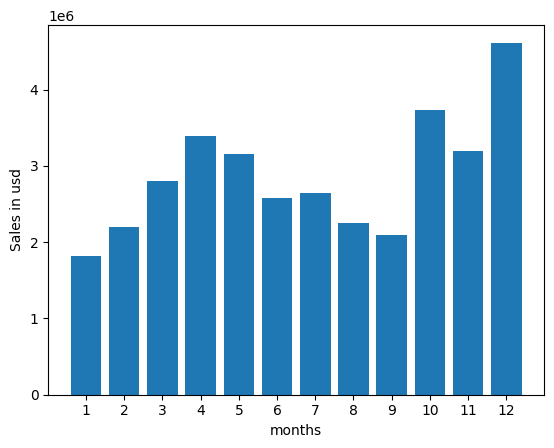

In [89]:
import matplotlib.pyplot as plt
result=all_data.groupby(['Month']).sum()
months=range(1,13)

plt.bar(months,result['Sale'])
plt.xticks(months)
plt.ylabel('Sales in usd')
plt.xlabel('months')
plt.show()

## question2 - which city has highest sales

In [98]:
# adding a new col - city
all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta


In [195]:
all_data['State']=all_data['Purchase Address'].apply(lambda x: x.split(',')[2])
all_data['State']=all_data['State'].apply(lambda x: x.split(' ')[1])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,State,City_state,hour,minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA,12,38


In [132]:
all_data['City_state']=all_data['City']+ ' ' +all_data['State']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,State,City_state
0,295665,Macbook Pro Laptop,1,1700.00,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY
1,295666,LG Washing Machine,1,600.00,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA


In [146]:
# which city has highest no of sales
all_data.groupby(['City_state']).sum()


/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/989287724.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['City_state']).sum()


,Quantity Ordered,Price Each,Month,Sale
City_state,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/4217096499.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result=all_data.groupby(['City_state']).sum()


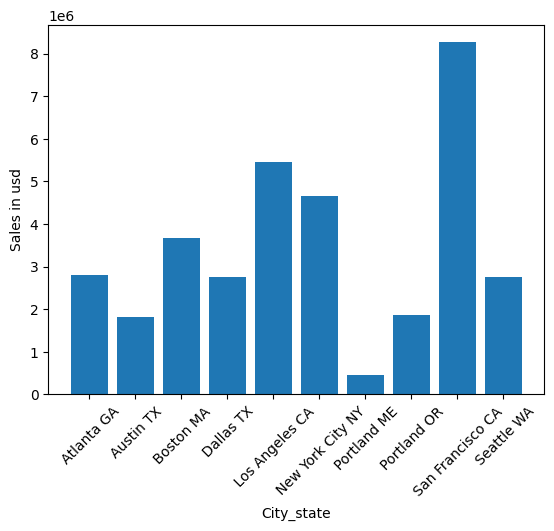

In [150]:
result=all_data.groupby(['City_state']).sum()

cities=[City_state for City_state, df in all_data.groupby('City_state')]

plt.bar(cities,result['Sale'])
plt.xticks(cities)
plt.xticks(rotation=45)
plt.ylabel('Sales in usd')
plt.xlabel('City_state')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?


In [152]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,State,City_state
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA


In [159]:
all_data['hour']=all_data['Order Date'].dt.hour
all_data['minute']=all_data['Order Date'].dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,State,City_state,hour,minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA,12,38


In [162]:
all_data.groupby('hour').count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,State,City_state,minute
hour,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


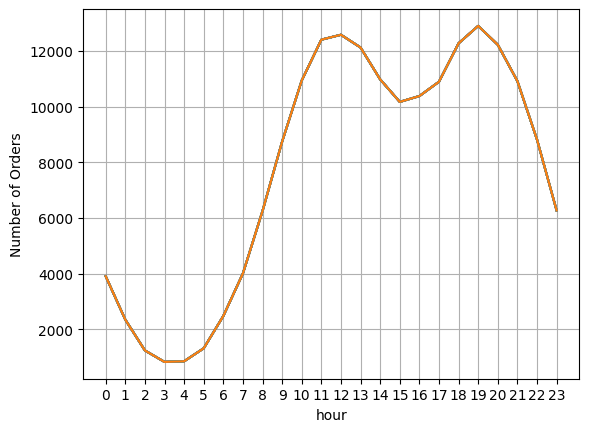

In [165]:
hours = [hour for hour, df in all_data.groupby('hour')]

plt.plot(hours, all_data.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel('hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()
# My recommendation is around 11am (11) or 7pm (19)

### Question 4: What products are most often sold together?

In [167]:
# products having same order id are bought together


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,State,City_state,hour,minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,NY,New York City NY,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,NY,New York City NY,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,NY,New York City NY,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,CA,San Francisco CA,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,GA,Atlanta GA,12,38
5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,NY,New York City NY,22,58
6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,OR,Portland OR,15,10
7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,TX,Dallas TX,9,29
8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,TX,Dallas TX,23,26
9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,TX,Dallas TX,11,51


In [170]:
# Use transform method to join values from two rows into a single row
df = all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped' ]].drop_duplicates()

df.head(100)

/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/1768619754.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
2297,297847,"iPhone,Lightning Charging Cable"
2345,297894,"USB-C Charging Cable,AA Batteries (4-pack)"
2347,297895,"USB-C Charging Cable,27in FHD Monitor"
2398,297945,"Vareebadd Phone,USB-C Charging Cable,Bose Soun..."


In [171]:
# Counting pairs of products
# example
from itertools import combinations 
from collections import Counter

list3 = [[2, 3], [2, 3, 4]]

count = Counter()

for sublist in list3:
    count.update(Counter(combinations (sublist, 2)))
    
print(count)

Counter({(2, 3): 2, (2, 4): 1, (3, 4): 1})


In [185]:
count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,3)))
    
for key, value in count.most_common(10):
    print (key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


## Question 5: What product sold the most? Why do you think it sold the most?


In [191]:
all_data.groupby('Product').sum().sort_values(by='Quantity Ordered',ascending=0)

/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/3085020436.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby('Product').sum().sort_values(by='Quantity Ordered',ascending=0)


,Quantity Ordered,Price Each,Month,Sale,hour,minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688


In [192]:
# hence aaa batteries sold the most


/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/2283108878.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity_ordered = product_group.sum()['Quantity Ordered']


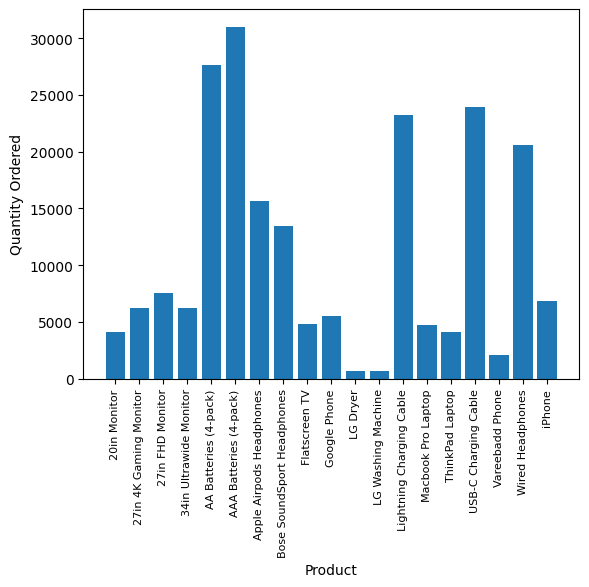

In [193]:
# ploting graph

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]
plt.bar(products, quantity_ordered) 

plt.ylabel('Quantity Ordered')
plt.xlabel ('Product')
plt.xticks(products, rotation='vertical', size=8)
plt.show()

/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/122213738.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/var/folders/lf/2mtz8vrd4fs7rxfr34br9c6w0000gn/T/ipykernel_1264/122213738.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


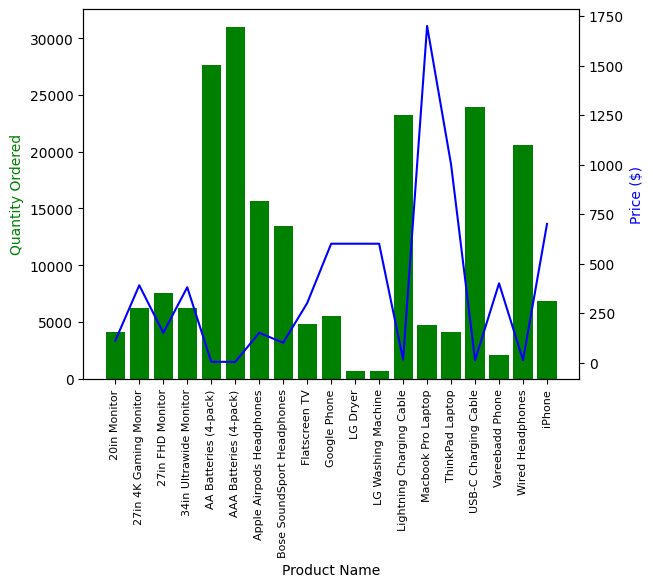

In [194]:
prices = all_data.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot (products, prices, 'b-') 

ax1. set_xlabel ('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt. show()